#Google Play Store Apps (Web scraped data of 10k Play Store apps for analysing the Android market)
Data Resource : https://www.kaggle.com/lava18/google-play-store-apps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.dropna(how='any', inplace=True)

In [7]:
df.shape

(9360, 13)

In [8]:
df.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [9]:
df.Reviews = df.Reviews.astype(int)

We can figure out that most of the Ratings are between 4 and 5

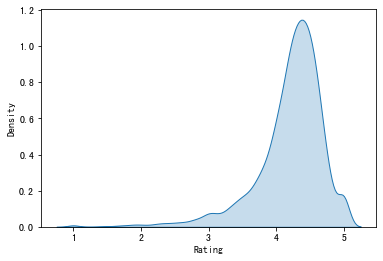

In [10]:
sns.kdeplot(df.Rating, shade= True)

In [11]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Top 2 Categories are Family and Game

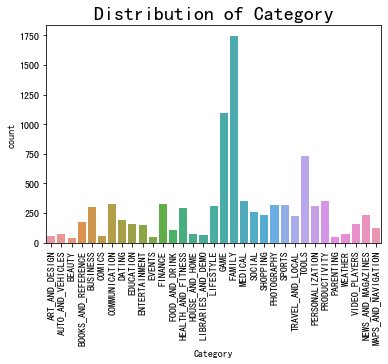

In [12]:
c = sns.countplot(x = 'Category', data = df)
c.set_xticklabels(c.get_xticklabels(), rotation = 90)
plt.title('Distribution of Category', size = 20)
plt.show()

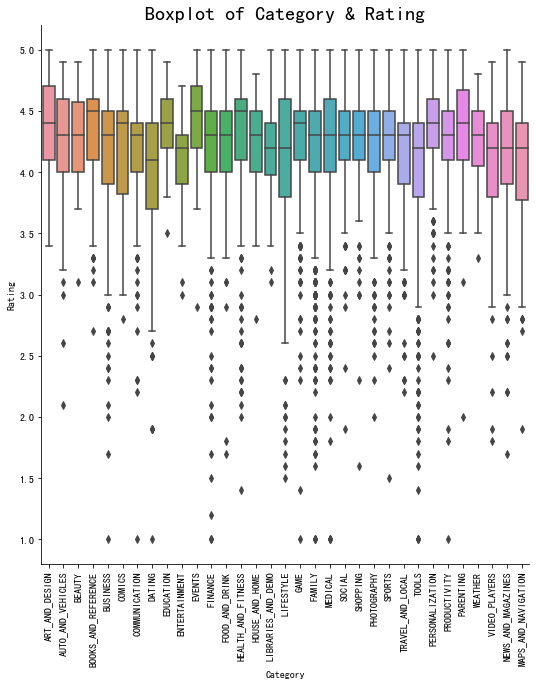

In [13]:
c = sns.catplot( x ='Category', y = 'Rating', data = df, kind = "box", height=8)
c.set_xticklabels(rotation=90)
plt.title('Boxplot of Category & Rating',size = 20)
plt.show()

Most of the app have less than 5M reviews, and those app with more than 5M reviews are famous app (Installs are high)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


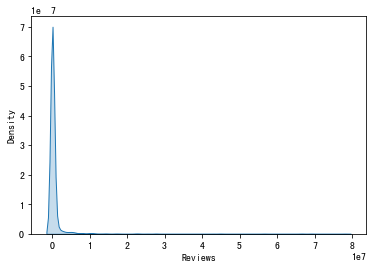

In [14]:
sns.kdeplot(df.Reviews, shade = True)
plt.show()

In [15]:
df[df['Reviews']>5000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8439,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 6, 2018",Varies with device,Varies with device
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15M,"100,000,000+",Free,0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up
8896,DU Battery Saver - Battery Charger & Battery Life,TOOLS,4.5,13479633,14M,"100,000,000+",Free,0,Everyone,Tools,"June 5, 2018",4.8.7.8,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71M,"100,000,000+",Free,0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up


High ranking apps get more reviews.

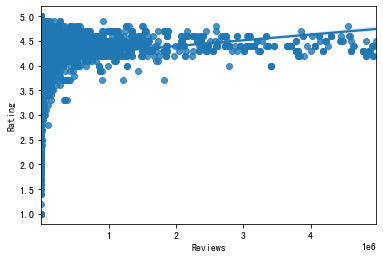

In [16]:
sns.regplot(x='Reviews',y='Rating',data=df[df['Reviews']<5000000])

In [17]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [18]:
df.Size.replace('Varies with device', np.nan, inplace = True)

In [19]:
df.Size = df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * df.Size.str.extract(r'([kM])', expand=False).fillna(1).replace(['k','M'],[10**3,10**6]).astype(int)

In [20]:
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True)

The size of most of the app are less than 40000000.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


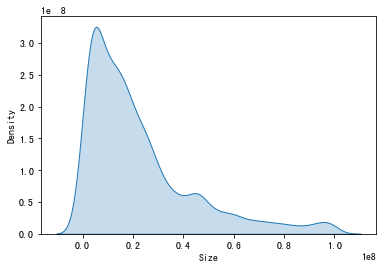

In [21]:
sns.kdeplot(df.Size, shade= True)

In [22]:
df.Installs = df.Installs.replace(r'[+]', '', regex=True)
df.Installs = df.Installs.replace(r'[,]','', regex = True).astype(int)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

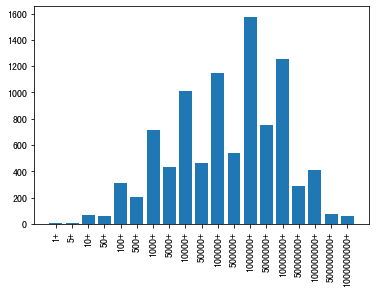

In [23]:
x = df.Installs.groupby(df.Installs).count().index
y = list(df.Installs.groupby(df.Installs).count().values)
plt.bar([str(i)+'+' for i in x ], y)
plt.xticks(rotation = 90)

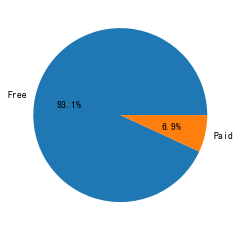

In [34]:
x = df.Type.groupby(df.Type).count().index.to_list()
y = df.Type.groupby(df.Type).count().values
fig = plt.pie(y, labels = x, autopct="%.1f%%")
